<a href="https://colab.research.google.com/github/Jalicia-Harris/2-Proposed-Dateset-Options/blob/main/Belt_Exam_2(Classification)_Jalicia_Harris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Student Name: Jalicia Harris
- Date: 5/14/2023

# Student Analysis - Machine Learning

- Task: Use your data science skills to help doctors recommend the best type of drug treatment for at-risk patients. Create a machine learning model using the information about the patients found in this dataset to help advise the doctors’ treatment choice.

## Rubric Checklist

- Prepare/clean the data for exploratory analysis purposes (note that you will have to deal with the many categorical variables).
 - [x]   Check for missing values. You should produce an output that shows the number of missing values for each feature.
 - [x]   For this task, handle missing values by using an appropriate imputation strategy (instead of dropping rows).
 - [x]   Write a justification of your strategy for imputing missing values.
 - [x]   Make sure you avoid any data leakage when you impute values.
 - [x]   Ensure data types match the data types listed in the data dictionary.
 - [x]   Check for and address any inconsistent values in categorical columns. (do not drop the entire feature)
 - [x]   Check for and address any impossible values in numeric columns.
- Explore the data
 - [x]   Create at least two different types of exploratory visualizations.
 - [x]   Write one to two sentences about what each visualization tells you about the data.
- Prepare the data appropriately for modeling
 - [x]   Implement a preprocessing pipeline to avoid data leakage.
 - [x]   Scale the data if your model requires it.
 - [x]   Write a justification for how you encode the variables (ordinal encoding vs one-hot encoding).
- Create and compare at least 2 different model types to predict drug type.
 - [ ]   Put your preprocessing and models into pipelines.
 - [ ]   For each model type, create a default version of each model with default hyperparameters.
 - [ ]   Create additional versions of each model type where you tune hyperparameters for each model.
 - [ ]   Use appropriate metrics to evaluate each model.
- Choose one final model.
 - [ ]   Write a justification of your choice of final model
- Include clear, commented, and organized code. Please note that points will be deducted for inclusion of:
 - [ ]   inappropriate or redundant code
 - [ ]   inappropriate or unused imports for modeling or evaluation metrics
errors remaining in code
 - [ ]   Inappropriate or unnecessary files

# Preliminary Steps:

## Import Packages and Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Suppress  All Warnings
import warnings
warnings.filterwarnings('ignore')

# Preprocessing packages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression

# Classification Metrics
from sklearn.metrics import (roc_auc_score, ConfusionMatrixDisplay,
                             PrecisionRecallDisplay, RocCurveDisplay,
                             f1_score, accuracy_score, precision_score,
                             recall_score, classification_report)
# Set global scikit-learn configuration
from sklearn import set_config
# Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

## Load and Inspect Data

In [2]:
# Load Data
df = pd.read_csv('/content/drive/MyDrive/Data/Belt2_A_drugtype_v2_final.csv')
df.head()

,Age,Gender,BP,Cholesterol,Na_to_K,Drug
0,59.0,M,High,HIGH,13.935,drugQ
1,40.0,F,Normal,HIGH,10.103,drugZ
2,NaN,M,Normal,HIGH,9.084,drugZ
3,62.0,M,Normal,HIGH,16.594,drugZ
4,55.0,F,High,NORMAL,10.977,drugQ


In [3]:
# Use df.shape to display number of rows and columns from dataframe
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable')

There are 296 rows, and 6 columns.
The rows represent 296 observations, and the columns represent 5 features and 1 target variable


In [4]:
# Display datatypes and compare to data dictionary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          237 non-null    float64
 1   Gender       296 non-null    object 
 2   BP           221 non-null    object 
 3   Cholesterol  296 non-null    object 
 4   Na_to_K      296 non-null    object 
 5   Drug         296 non-null    object 
dtypes: float64(1), object(5)
memory usage: 14.0+ KB


- According to the data dictionary, the 'Na_to_K' column is datatyped as an object but should be a float. This will be addressed and corrected in the next section.

## Clean and Prepare Data

### Check for Duplicates

In [5]:
# Identify any possible duplicates
df.duplicated().sum()

15

In [6]:
# Drop duplicates and confirm results
df = df.drop_duplicates()
df.duplicated().sum()

0

### Check for Missing Values

In [7]:
# Diaplay total number of missing values
print(f'There are {df.isna().sum().sum()} missing values')

There are 129 missing values


In [8]:
# Check for missing values
df.isna().sum()

Age            54
Gender          0
BP             75
Cholesterol     0
Na_to_K         0
Drug            0
dtype: int64

- A SimpleImputer will be used on the 'Age' column in the preprocessing steps to replace the missing values with the average. The reasoning behind this action to fill in values with the average is the give a general age as opposed to the an age median.
- A SimpleImputer will be used on the 'BP' column to impute the 'most frequent' value since we are unable to find out what the values should be.

In [9]:
# Change column to the correct datatype
df['Na_to_K'].astype(float)

ValueError: ignored

In [10]:
# Locate the odd value using a filter
df[df['Na_to_K'] == '10.403_']

,Age,Gender,BP,Cholesterol,Na_to_K,Drug
270,NaN,M,High,HIGH,10.403_,drugQ


- The discrepancy is located as an odd value of '10.403_' on row 270 in the column
- The value will be corrected and the column will be changed to the 'float' datatype

In [11]:
# Correct the odd value and the column to a float
df.loc[270, 'Na_to_K'] = 10.403
df['Na_to_K'] = df['Na_to_K'].astype(float)

In [12]:
# Check for and address any inconsistent values in numeric columns
df.describe(include='number')

,Age,Na_to_K
count,227.000000,281.000000
mean,47.475771,14.862769
std,38.359652,6.474826
min,15.000000,6.269000
25%,32.000000,10.446000
50%,45.000000,12.856000
75%,59.000000,17.206000
max,570.000000,38.247000


- There is an impossible value located in the 'Age' column as max = 570
- The value will be replaced with the 'Age' column's median

In [13]:
# Use a filter to locate the value
df[df['Age'] == 570]

,Age,Gender,BP,Cholesterol,Na_to_K,Drug
232,570.0,F,Normal,HIGH,14.216,drugZ


In [14]:
# Fix the discrepancy
df.loc[232, 'Age'] = df['Age'].median()
# Confirm results
df.describe(include='number')

,Age,Na_to_K
count,227.000000,281.000000
mean,45.162996,14.862769
std,16.062787,6.474826
min,15.000000,6.269000
25%,32.000000,10.446000
50%,45.000000,12.856000
75%,58.500000,17.206000
max,74.000000,38.247000


In [15]:
# Check for and address any inconsistent values in categorical columns
df.describe(include='object')

,Gender,BP,Cholesterol,Drug
count,281,206,281,281
unique,8,3,5,2
top,M,High,HIGH,drugZ
freq,140,128,145,147


In [16]:
# Checking for disrepancies in categorical data column 'Gender'
df['Gender'].value_counts()

M         140
F         131
male        4
female      2
Female      1
Male        1
femal       1
Femal       1
Name: Gender, dtype: int64

In [17]:
# Fix discrepancies
df['Gender'].replace({"male":"M", "female":"F", "Female":"F", "Male":"M", "femal":"F", "Femal":"F"}, inplace=True)
df['Gender'].value_counts()

M    145
F    136
Name: Gender, dtype: int64

In [18]:
# Checking for disrepancies in categorical data column 'Cholesterol'
df['Cholesterol'].value_counts()

HIGH      145
NORMAL    114
norm        9
high        7
NORM        6
Name: Cholesterol, dtype: int64

In [19]:
# Fix discrepancies
df['Cholesterol'].replace({"norm":"NORMAL", "high":"HIGH", "NORM":"NORMAL"}, inplace=True)
df['Cholesterol'].value_counts()

HIGH      152
NORMAL    129
Name: Cholesterol, dtype: int64

### Explore the Data Using Visualizations

<Axes: xlabel='Cholesterol', ylabel='Count'>

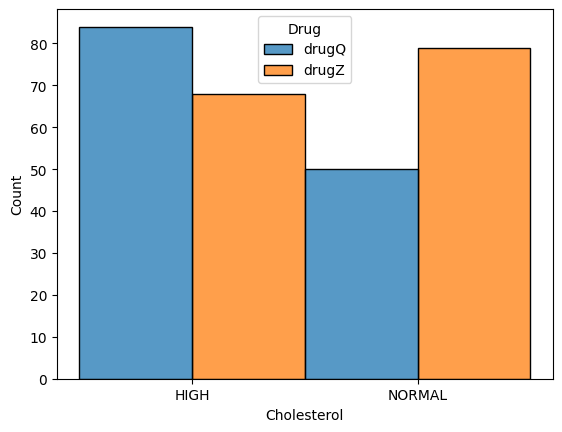

In [20]:
# Create a histogram to compare drugs' Q and Z with cholesterol levels
sns.histplot(binwidth=1,
             hue=df['Drug'],
             x=df['Cholesterol'],
             stat="count",
             multiple="dodge")

- Based off the chart above, 'drugZ' gets prescribed more to patients that have a normal cholesterol level and 'drugQ' gets prescribed more to patients that have a high cholesterol level.

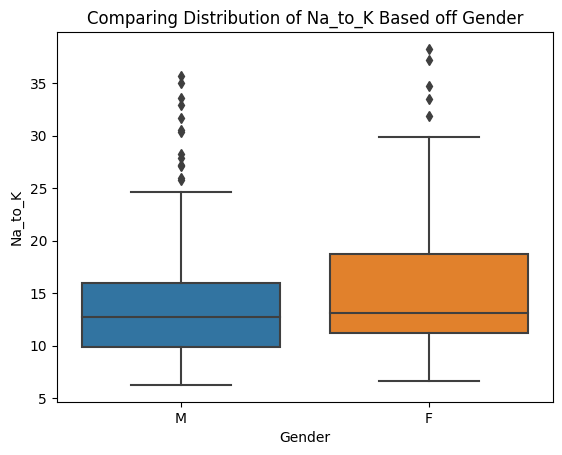

In [21]:
data = df['Na_to_K']
ax = sns.boxplot(x='Gender', y='Na_to_K', data=df)
ax.set_title("Comparing Distribution of Na_to_K Based off Gender");

- Based off the graph above, female patients have a larger range in Na_to_K levels than male patients.

## Model Validation Data Split

### Create a Copy of the Dataset

In [22]:
# Create a copy of the dataset for modeling
df_md = df.copy()

### Check Class Balance

In [23]:
df_md['Drug'].value_counts(normalize=False)

drugZ    147
drugQ    134
Name: Drug, dtype: int64

### Assign X (features) and y (target) for Train Test Split

In [24]:
# Define features (X) and target (y)
X = df.drop(columns = ['Drug']).copy()
y = df['Drug'].copy()

In [25]:
# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

### Check Class Balance

In [26]:
# Check amount of samples for each class for train data
y_train.value_counts(normalize=True)

drugZ    0.52381
drugQ    0.47619
Name: Drug, dtype: float64

In [27]:
y_test.value_counts(normalize=True)

drugZ    0.521127
drugQ    0.478873
Name: Drug, dtype: float64

### Create Necessary Pipelines and ColumnTransformers

- numeric - 'Na_to_K': numeric selector
- oridinal - 'BP', 'Cholesterol': Ordinal Encoder
- nominal - 'Gender': OneHotEncoder

#### ColumnTransformers

In [28]:
# Create a SimpleImputer to impute missing values for the 'Age' column
# Transformers
mean_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
# Pipeline
num_pipe = make_pipeline(mean_imputer, scaler)
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')
# Tuples for Column Transformer
num_tuple = (num_pipe, num_selector)
cat_tuple = (ohe, cat_selector)

In [29]:
cat_selector(X_train)

['Gender', 'BP', 'Cholesterol']

In [30]:
num_selector(X_train)

['Age', 'Na_to_K']

#### Ordinal Transformer

In [31]:
# Create Category Lists
bp_list = ['Low', 'Normal', 'High']
cholesterol_list = ['NORMAL', 'HIGH']
# Transformers
ord = OrdinalEncoder(categories=[bp_list, cholesterol_list], handle_unknown='use_encoded_value',unknown_value=-1)
# Create a most frequent imputer for the missing values of the 'BP' column
freq_imputer = SimpleImputer(strategy='most_frequent')
# Create another scaler for the ordinal values
scaler2 = StandardScaler()

# Pipeline
ord_pipe = make_pipeline(freq_imputer, ord, scaler)
# Selector
ord_selector = ['BP', 'Cholesterol']
# Tuple
ord_tuple = (ord_pipe, ord_selector)

In [32]:
# Instantiate the make column transformer
preprocessor = make_column_transformer(num_tuple, cat_tuple, ord_tuple, remainder='drop')

## Create and Compare at Least 2 Different Models:

### KNN Model

In [33]:
# Create an instance of the model
knn = KNeighborsClassifier()
# Create a model pipeline
knn_pipe = make_pipeline(preprocessor, knn)
# Fit the Model
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fbd694e1840>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_tra...e12a0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Normal',
                                                                                               'High'],
                                                                                              ['NORMAL',
                                                                                               'HIGH']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['BP', 'Cholesterol'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

### KNN Model Evaluation

In [34]:
# Predict the values for the train dataset
knn_train_preds = knn_pipe.predict(X_train)
#Predict the values for the test dataset
knn_test_preds = knn_pipe.predict(X_test)

In [35]:
# Print the Classification Reports
labels = ['drugZ', 'drugQ']
print('Train Report')
print(classification_report(y_train, knn_train_preds, target_names=labels))

print('Test Report')
print(classification_report(y_test, knn_test_preds, target_names=labels))

Train Report
              precision    recall  f1-score   support

       drugZ       0.90      0.95      0.92       100
       drugQ       0.95      0.90      0.93       110

    accuracy                           0.92       210
   macro avg       0.92      0.93      0.92       210
weighted avg       0.93      0.92      0.92       210

Test Report
              precision    recall  f1-score   support

       drugZ       0.81      0.88      0.85        34
       drugQ       0.88      0.81      0.85        37

    accuracy                           0.85        71
   macro avg       0.85      0.85      0.85        71
weighted avg       0.85      0.85      0.85        71



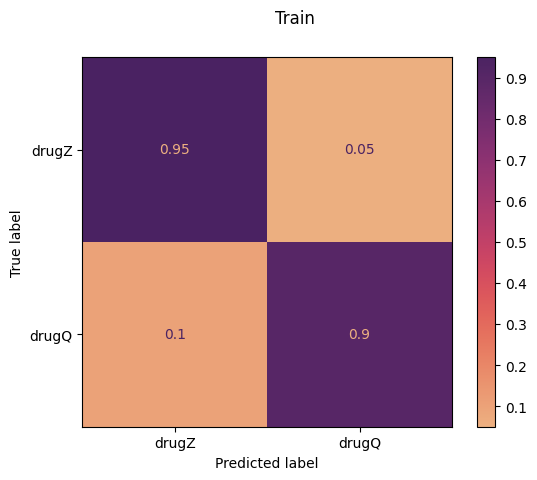

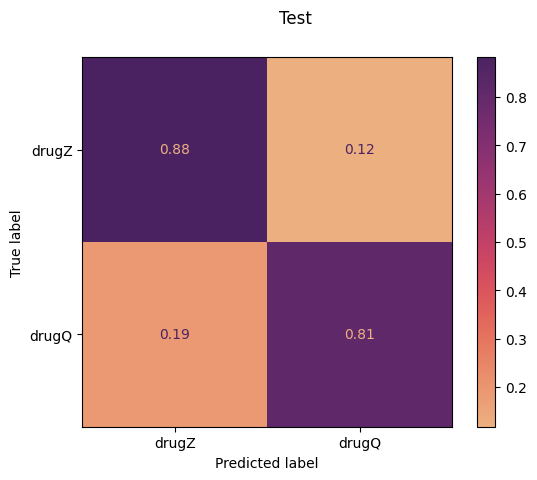

In [36]:
# Create Confusion Matrices
ConfusionMatrixDisplay.from_predictions(y_train, knn_train_preds, normalize='true', display_labels=labels, cmap='flare')
plt.suptitle('Train');

ConfusionMatrixDisplay.from_predictions(y_test, knn_test_preds, normalize='true', display_labels=labels, cmap='flare')
plt.suptitle('Test');

#### Tune the Hyperparameters

In [37]:
# Use function to display the hyperparameters
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fbd694e1840>),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fbd694e12a0>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     Simp

In [38]:
# Create a dictionary of parameters

params = {'kneighborsclassifier__n_neighbors': range(1,15),
          'kneighborsclassifier__weights': ['distance','uniform']}

In [39]:
# Tune hyperparameters with GridSearchCV
knn_gs = GridSearchCV(knn_pipe, params)
knn_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fbd694e1840>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         <skle...
                                                                                          OrdinalEncoder(categories=[['Low',
                                                                                                                      'Normal',
                                                                                                                      'High'],
                                                                                                                     ['NORMAL',
                                                                                                                      'HIGH']],
                                                                                                         handle_unknown='use_encoded_value',
                                                                                                         unknown_value=-1)),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['BP',
                                                                          'Cholesterol'])])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': range(1, 15),
                         'kneighborsclassifier__weights': ['distance',
                                                           'uniform']})

In [40]:
# Find the best parameters for the model
knn_gs.best_params_

{'kneighborsclassifier__n_neighbors': 1,
 'kneighborsclassifier__weights': 'distance'}

In [41]:
knn_gs.best_score_

0.9238095238095237

In [42]:
best_knn = knn_gs.best_estimator_

In [43]:
# Instantiate and fit GridSearchCV
train_preds = best_knn.predict(X_train)
test_preds = best_knn.predict(X_test)

In [44]:
print('Train\n', classification_report(y_train, train_preds))
print('Test\n', classification_report(y_test, test_preds))

Train
               precision    recall  f1-score   support

       drugQ       1.00      1.00      1.00       100
       drugZ       1.00      1.00      1.00       110

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210

Test
               precision    recall  f1-score   support

       drugQ       0.89      0.94      0.91        34
       drugZ       0.94      0.89      0.92        37

    accuracy                           0.92        71
   macro avg       0.92      0.92      0.92        71
weighted avg       0.92      0.92      0.92        71



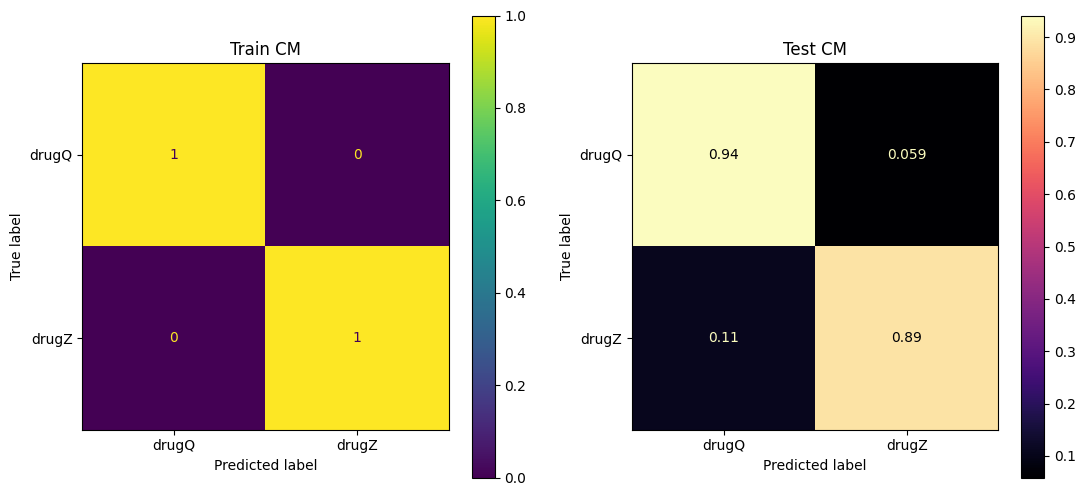

In [45]:
# Check the class balance again to help us choose a metric
# Display the test and training Confusion Matrix
fig, axes = plt.subplots(ncols=2, figsize=(13,6))

ConfusionMatrixDisplay.from_predictions(y_train, train_preds,
                                        ax=axes[0], cmap='viridis',normalize='true')

axes[0].set_title('Train CM')
ConfusionMatrixDisplay.from_predictions(y_test, test_preds,
                                        ax=axes[1], cmap='magma',normalize='true')

axes[1].set_title('Test CM');


### Decision Tree Classsifier

In [46]:
dec_tree = DecisionTreeClassifier()

dec_pipe = make_pipeline(preprocessor, dec_tree)

dec_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fbd694e1840>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_tra...0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Normal',
                                                                                               'High'],
                                                                                              ['NORMAL',
                                                                                               'HIGH']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['BP', 'Cholesterol'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

#### Decision Tree Model Evaluation

In [47]:
train_preds = dec_pipe.predict(X_train)
test_preds = dec_pipe.predict(X_test)

print('train')
print(classification_report(y_train, train_preds))

print('test')
print(classification_report(y_test, test_preds))

train
              precision    recall  f1-score   support

       drugQ       1.00      1.00      1.00       100
       drugZ       1.00      1.00      1.00       110

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210

test
              precision    recall  f1-score   support

       drugQ       0.97      1.00      0.99        34
       drugZ       1.00      0.97      0.99        37

    accuracy                           0.99        71
   macro avg       0.99      0.99      0.99        71
weighted avg       0.99      0.99      0.99        71



- I have chosen the decision tree model based on the higher accuracy percentage it produces with the testing dataset.

## Cited Sources:

- Box Plots - https://colab.research.google.com/drive/1Wo0wcaD58P_1H00G02Iqm669Lr_N75rL
- Belt Exam 1 - https://colab.research.google.com/drive/1QXR32EF-lBhUBuZ55zT4gjfqF1sY0Q8p#scrollTo=sguTEJASfu7n
- Filtering - https://login.codingdojo.com/m/606/13762/97748
- Bar Plots in Seaborn - https://colab.research.google.com/drive/1S26CtENbJMLQ535xW63A7gO0mZpReo7J
- Train Test Split - https://login.codingdojo.com/m/213/7153/51856
- Pipelines and ColumnTransformers Together - https://login.codingdojo.com/m/213/7153/70749
- Histograms - https://login.codingdojo.com/m/606/13764/97779
- Ordinal and OneHotEncoder in Python - https://login.codingdojo.com/m/213/7153/70205
- Pipelines Activity - https://colab.research.google.com/drive/1iLHZJtSfh0DuQ45tYFYW1PcxA2mP1rQe
- Abalone Preprocessing Exercise - https://colab.research.google.com/drive/1zdPxEc0q3ivWIkoUUzcW3FMowstD9tfM
- KNN Using Python - https://login.codingdojo.com/m/213/7198/52281
- Mock Belt Exam_Classification(Solution Notebook) - https://colab.research.google.com/drive/1EiUIVQFxIaAdyO0xHtMYSYpjNTkWxxhD#scrollTo=OKqjckIYmW3p
- Classification Trees in Python - https://login.codingdojo.com/m/213/7198/63426